In [1]:
import random
import copy
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
POPULATION_SIZE = 20
CITIES_SIZE = 20
TOUR_SIZE = 21
NUM_EXECUTION = 9999
population = []
x = []
y = []
tour = [[0 for x in range(TOUR_SIZE)] for y in range(TOUR_SIZE)]
dCidade = [[0 for x in range(POPULATION_SIZE)] for y in range(POPULATION_SIZE)]
distances = [0 for x in range(POPULATION_SIZE)]
parentsOne = None
parentsTwo = None
costByExecution = []

In [3]:
#Getting the first population

def generateFirstPopulation():
    # For each position, generates a new possible path
    for _ in range(1, POPULATION_SIZE + 1):
        generatePossiblePath()

In [4]:
#For generating a new possible path for the population

def generatePossiblePath():
    path = []
    for _ in range(1, CITIES_SIZE + 1):
        # generates a new number between 1 - 20
        randomNum = random.randint(1, 20)
        # while the generated number exists in the list, generates a new one
        while(numberExistsInPath(path, randomNum)):
            randomNum = random.randint(1, 20)
        path.append(randomNum)
    population.append(path)

In [5]:
#To check if the city number already exists in path
def numberExistsInPath(path, number):
    for i in path:
        if i == number:
            return True
    return False

In [6]:
#Random generstion of values for x and y co ordinates for cities and creaation of x and y array

def generateXandY():
    for _ in range(CITIES_SIZE):
        randomNumber = random.random()
        randomNumber = round(randomNumber, 2)
        x.append(randomNumber)

        randomNumber = random.random()
        randomNumber = round(randomNumber, 2)
        y.append(randomNumber)

In [7]:

#makes the swap between 2 cities in the path with a 5% chance of mutation

def mutate(matrix):
    for i in range(0, len(matrix)):
        for _ in range(0, len(matrix[i])):
            ranNum = random.randint(1, 100)
            if ranNum >= 1 and ranNum <= 5:
                indexOne = random.randint(0, 19)
                indexTwo = random.randint(0, 19)
                auxOne = matrix[i][indexOne]
                auxTwo = matrix[i][indexTwo]
                matrix[i][indexOne] = auxTwo
                matrix[i][indexTwo] = auxOne

In [8]:
#Generation of tour matrix

def generateTour():
    global tour
    tour = copy.deepcopy(population)
    for ways in tour:
        first = ways[0]
        ways.append(first)

In [9]:
#calculate path distances for the solutions

def calculateDistances():
    global distances
    distances = [0 for x in range(POPULATION_SIZE)]
    for i in range(len(population)):
        for j in range(len(population[i])):
            firstPos = 19 if tour[i][j] == 20 else tour[i][j]
            secondPos = 19 if tour[i][j+1] == 20 else tour[i][j+1]
            distances[i] += round(dCidade[firstPos][secondPos], 4)
    dict_dist = {i: distances[i] for i in range(0, len(distances))}
    distances = copy.deepcopy(dict_dist)
    return sorted(distances.items(), key=lambda kv: kv[1])

In [10]:
#Generation of identity matrix dCidade
def fitnessFunction():
    for i in range(len(population)):
        for j in range(len(population)):
            dCidade[i][j] = round(math.sqrt(((x[i] - x[j])**2) + ((y[i] - y[j])**2)), 4)
    return calculateDistances()


In [11]:
#Generate the roulette function for selection of bes two parents
def rouletteFunction(sorted_x):
    global parentsOne
    global parentsTwo
    arr = []
    rouletteArr = []
    for i in range(10):
        arr.append(sorted_x[i][0])
    for j in range(len(arr)):
        for _ in range(10 - j):
            rouletteArr.append(arr[j])
    parentsOne = createParents(rouletteArr)
    parentsTwo = createParents(rouletteArr)

In [12]:
#Generate the two parent arrays
def createParents(rouletteArr):
    parentArr = []
    for _ in range(5):
        parentArr.append(rouletteArr[random.randint(0, 54)])
    return parentArr

In [13]:
#Check for duplicated cities
def hasDuplicity(auxArray, usedIndexes):
    for i in range(len(auxArray)):
        for j in range(i, len(auxArray)):
            if i != j and auxArray[i] == auxArray[j]:
                if i in usedIndexes:
                    return j
                else:
                    return i
    return -1

In [15]:
#Perform crossover for each two children in the children array ans swap between them until there's no duplicated element
#Mutate children generated
#Add them to the population array 
def doCycle(sorted_x):
    global population
    children = []

    for i in range(5):
        parentOneAux = parentsOne[i]
        parentTwoAux = parentsTwo[i]
        usedIndexes = []

        randomIndexInsideCromossomus = random.randint(0, POPULATION_SIZE - 1)

        usedIndexes.append(randomIndexInsideCromossomus)

        childOne = copy.deepcopy(population[parentOneAux])
        childTwo = copy.deepcopy(population[parentTwoAux])

        valAuxOne = childOne[randomIndexInsideCromossomus]
        valAuxTwo = childTwo[randomIndexInsideCromossomus]

        childOne[randomIndexInsideCromossomus] = valAuxTwo
        childTwo[randomIndexInsideCromossomus] = valAuxOne

        while(hasDuplicity(childOne, usedIndexes) != -1):
            newIndex = hasDuplicity(childOne, usedIndexes)
            usedIndexes.append(newIndex)

            valAuxOne = childOne[newIndex]
            valAuxTwo = childTwo[newIndex]

            childOne[newIndex] = valAuxTwo
            childTwo[newIndex] = valAuxOne

        # After generating the children, add them in the children's array
        children.append(childOne)
        children.append(childTwo)

    # Mutate the children array
    mutate(children)

    # Make a temp copy of the population before changing it
    tempPop = copy.deepcopy(population)

    for i in range(10):
        population[i] = copy.deepcopy(tempPop[sorted_x[i][0]])

    # Adjust the population
    for j in range(10, POPULATION_SIZE):
        population[j] = copy.deepcopy(children[j - 10])


Total population: 20
Mutation probability: 5%
Number of cities: 20
Optimal path cost: 4.374699999999999
Best route: [20, 12, 14, 1, 7, 13, 2, 16, 17, 18, 19, 4, 8, 15, 9, 11, 5, 6, 10, 3]


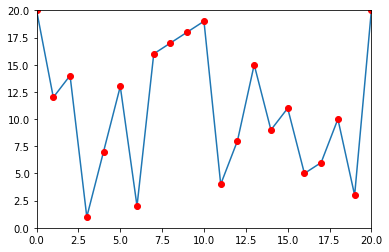

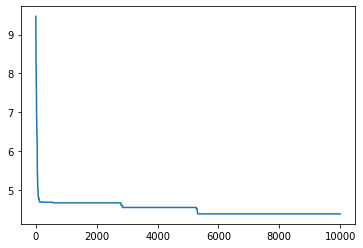

In [16]:
def main():
    # Runs only once. Generates the population, x and y, and tour matrix
    generateFirstPopulation()
    generateXandY()
    generateTour()

    # Runs in a loop 0 - 9999.
    for _ in range(NUM_EXECUTION):
        sorted_x = fitnessFunction()
        rouletteFunction(sorted_x)
        doCycle(sorted_x)
        generateTour() # Generate the Tour matrix again, as the population is updated
        costByExecution.append(sorted_x[0][1]) # Appends the cost to the array of costs (plotted at the end)

    # Generates the fitness values for the last population
    sorted_x = fitnessFunction()

    print('Total population: %s' % (POPULATION_SIZE))
    print('Mutation probability: 5%')
    print('Number of cities: %s' % (CITIES_SIZE))
    print('Optimal path cost: %s' % sorted_x[0][1])
    print('Best route: %s' % population[0])

    # Show the path graph
    plt.plot(tour[0])
    plt.plot(tour[0], 'ro')
    plt.axis([0, 20, 0, 20])
    plt.show()

    # Show the cost graph
    plt.plot(costByExecution)
    plt.show()

if __name__ == "__main__":
    main()